In [1]:
# Importo algunas librerias que voy a necesitar
# coding: latin-1
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from time import time #me sirve para medir tiempos de procesamiento

In [2]:
print('Primero busco leer tensores y poder plotear sus valores...')
# Base de datos a utilizar: archivo "eeg.dat" dentro de "Protocolo"
signals = pd.read_csv('C:/Users/Ariel/Desktop/ITBA/10_Cient_y_Geo/TP3/Protocolo/eeg.dat', delimiter=' ', names = ['timestamp','counter','eeg','attention','meditation','blinking'])

Primero busco leer tensores y poder plotear sus valores...


In [4]:
print('Estructura de la informacion del archivo "eeg":')
print(signals.head()) #Veo primeras filas del archivo para ver como esta estructurado

#print('Filtrar segun informacion especifica:')
#print(signals[signals.counter > 45])

data = signals.values #Me permite pasar la base de datos a una matriz numerica

print('Ahora tenemos un tensor de numpy (data)')
print (data)

print('Forma %2d,%2d:' % (signals.shape)) #Veo que el archivo total tiene 339301 filas y 6 columnas

print('Python slicing...[:,].  El \':\' sirve para indicar el rango desde hasta.  Los indices son posiciones segun la forma del tensor.')
eeg = data[:,2] #Del electro me quedo con todas las filas y solo la segunda columna (la de counter)

Estructura de la informacion del archivo "eeg":
      timestamp  counter  eeg  attention  meditation  blinking
0  1.655925e+09       68   32          0           0         0
1  1.655925e+09       69   40          0           0         0
2  1.655925e+09       70   42          0           0         0
3  1.655925e+09       71   34          0           0         0
4  1.655925e+09       72   24          0           0         0
Ahora tenemos un tensor de numpy (data)
[[1.65592476e+09 6.80000000e+01 3.20000000e+01 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [1.65592476e+09 6.90000000e+01 4.00000000e+01 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [1.65592476e+09 7.00000000e+01 4.20000000e+01 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 ...
 [1.65592542e+09 1.40000000e+01 9.10000000e+01 4.10000000e+01
  2.60000000e+01 0.00000000e+00]
 [1.65592542e+09 1.50000000e+01 1.14000000e+02 4.10000000e+01
  2.60000000e+01 0.00000000e+00]
 [1.65592542e+09 1.60000000e+01 1.03000000e+02 4.10000

In [5]:
print(eeg)

# Ojo con el filtro OR.
eeg[eeg>80]
eegfiltered = np.logical_or(eeg>10,eeg<-40) 

[ 32.  40.  42. ...  91. 114. 103.]


Este es el plot del electrocardiograma completo (339301 observaciones):


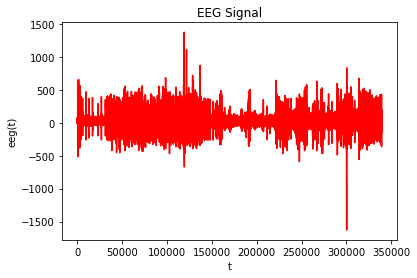

In [6]:
#t = np.linspace(-0.02, 0.05, 1000)
#plt.plot(t, 325 * np.sin(2*np.pi*50*t));
plt.plot(eeg,'r', label='EEG')
plt.xlabel('t'); #defino label x para el grafico
plt.ylabel('eeg(t)'); #defino label y para el grafico
#plt.title(r'Plot of CT signal $x(t)=325 \sin(2\pi 50 t)$');
plt.title(r'EEG Signal')
#plt.ylim([-2000, 2000]);
#plt.xlim([0,len(eeg)])
print('Este es el plot del electrocardiograma completo (339301 observaciones):')
plt.show()

Este es el grafico utilizando el paquete seaborn:


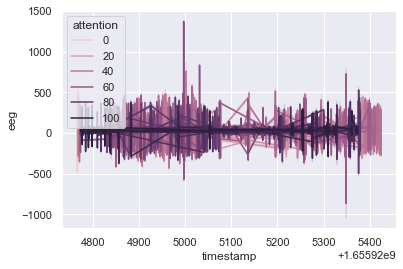

Tiempo que tarda en graficar los datos: 276.58 s


In [21]:
# Armado de graficos con seaborn (tarda algo mas en procesar)
print('Este es el grafico utilizando el paquete seaborn:')
import seaborn as sns
t0 = time()
sns.set(style="darkgrid")
sns.lineplot(x="timestamp", y="eeg", hue="attention", data=signals)
import matplotlib.pyplot as plt
plt.show()
t1 = time()
print('Tiempo que tarda en graficar los datos: {} s'.format(round(t1-t0,2)))

In [ ]:
#Tareas a seguir:
# Completar en caso que haya counters que no sean consecutivos. Esas filas deben ser el promedio de la anterior y la siguiente
# Identificar picos y valles del eef
#

TypeError: '(slice(None, None, None), 2)' is an invalid key

The Lag plot can be used to understand the correlation between consecutive time points.


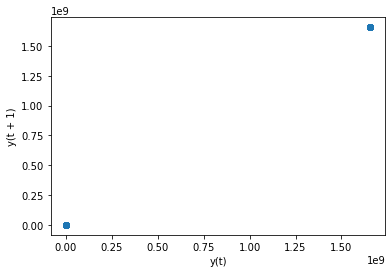

In [22]:
signals = signals.astype('float32')
print('The Lag plot can be used to understand the correlation between consecutive time points.')
from matplotlib import pyplot
from pandas.plotting import lag_plot
lag_plot(signals)
pyplot.show()

2


In [16]:
print(signals(1,1))

TypeError: 'DataFrame' object is not callable

In [17]:
signals_array = np.asarray(signals)

69.0

In [19]:
signals_array

,timestamp,counter,eeg,attention,meditation,blinking
0,1.655925e+09,68,32,0,0,0
1,1.655925e+09,69,40,0,0,0
2,1.655925e+09,70,42,0,0,0
3,1.655925e+09,71,34,0,0,0
4,1.655925e+09,72,24,0,0,0
...,...,...,...,...,...,...
339296,1.655925e+09,12,86,41,26,0
339297,1.655925e+09,13,75,41,26,0
339298,1.655925e+09,14,91,41,26,0
339299,1.655925e+09,15,114,41,26,0


In [20]:
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))

NameError: name 'dataset' is not defined